In [1]:
import numpy as np
from mixsol import Powder, Solution, Weigher, Mixer, calculate_molar_mass

# Powder Weighing

In [3]:
powders = [
    Powder('Cs_I'),
    Powder('Pb_I2'),
    Powder('Pb_Br2'),
    Powder('Pb_Cl2'),
    Powder(
        formula='MA_I',
        molar_mass=calculate_molar_mass('C_H6_N_I'),
        alias='MAI',
    ),
    Powder(
        formula='FA_I',
        molar_mass = calculate_molar_mass('C_H5_N2_I'),
        alias='FAI',
        )
]

weigher = Weigher(
    powders=powders
)

In [9]:
target=Solution(
    solutes='Cs0.05_FA0.8_MA0.15_Pb_I2.4_Br0.45_Cl0.15',
    solvent='DMF9_DMSO1',
    molarity=1
)

answer = weigher.get_weights(
    target,
    volume=1e-3, #in L
)
print(answer) #masses of each powder, in grams

{'Cs_I': 0.012990496098, 'Pb_I2': 0.322706258, 'Pb_Br2': 0.082576575, 'Pb_Cl2': 0.020857935, 'MAI': 0.02384543385, 'FAI': 0.1375746568}


In [11]:
result = weigher.weights_to_solution(
    weights=answer,
    volume=1e-3,
    solvent='DMF9_DMSO1',
    norm='Pb'
)
print(result)

1.0M Cl0.15_Br0.45_Pb_I2.4_Cs0.05_FA0.8_MA0.15 in DMF9_DMSO


In [12]:
result == target

True

# Solutions

In [14]:
stock_solutions = [
    Solution(
        solutes='FA_Pb_I3',
        solvent='DMF9_DMSO1',
        molarity=1,
        alias='FAPI'
    ),
    Solution(
        solutes='MA_Pb_I3',
        solvent='DMF9_DMSO1',
        molarity=1,
        alias='MAPI'
    ),
    
]

# densetargets = []
# for a in np.logspace(0, -3, 10):
#     densetargets.append(Solution(
#         solutes=f"FA{a:0.3f}_MA{1-a:.3f}_Pb_I3",
#         solvent="DMF9_DMSO1",
#         molarity=1,
#         alias=f'FA_{a:.3f}'
#     ))


densetargets = []
for a in np.linspace(0, 0.8, 10):
    densetargets.append(Solution(
        solutes=f"FA{a:0.3f}_MA{1-a:.3f}_Pb_I3",
        solvent="DMF9_DMSO1",
        molarity=1,
        alias=f'FA_{a:.3f}'
    ))

In [15]:
densetargets

[<Solution>FA_0.000,
 <Solution>FA_0.089,
 <Solution>FA_0.178,
 <Solution>FA_0.267,
 <Solution>FA_0.356,
 <Solution>FA_0.444,
 <Solution>FA_0.533,
 <Solution>FA_0.622,
 <Solution>FA_0.711,
 <Solution>FA_0.800]

In [16]:
sm = Mixer(stock_solutions, {t:60 for t in densetargets})

In [17]:
sm.solve(min_volume=20, max_inputs = 3)

In [19]:
sm.print()

===== Stock Prep =====
360.00 of MAPI
240.00 of FAPI
====== Mixing =====
Distribute MAPI:
	60.00 to FA_0.000
	63.96 to FA_0.444
	63.48 to FA_0.533
	67.62 to FA_0.356
	29.94 to FA_0.267
	45.00 to FA_0.178
	30.00 to FA_0.089
Distribute FAPI:
	51.07 to FA_0.444
	72.45 to FA_0.533
	37.38 to FA_0.356
	50.84 to FA_0.711
	28.25 to FA_0.800
Distribute FA_0.444:
	55.03 to FA_0.711
Distribute FA_0.533:
	30.06 to FA_0.267
	45.87 to FA_0.622
Distribute FA_0.356:
	45.00 to FA_0.178
Distribute FA_0.711:
	45.87 to FA_0.622
Distribute FA_0.178:
	30.00 to FA_0.089
Distribute FA_0.622:
	31.75 to FA_0.800


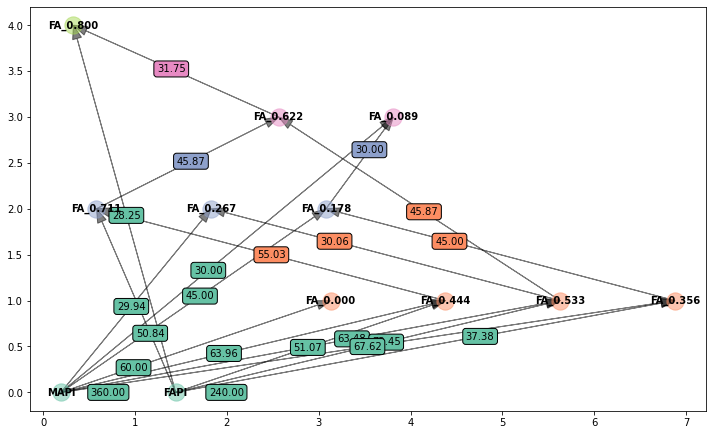

In [20]:
sm.plot()